<a href="https://colab.research.google.com/github/Anushka-999/IPL-Data-Analytics---Match-Outcome-Prediction/blob/main/IPL_Data_Analytics_%26_Match_Outcome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [4]:
#Data Loading and Preprocessing
import pandas as pd
import numpy as np

# Load the datasets
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliverie(s).csv')

# Quick overview of the datasets
print("Matches dataset shape:", matches_df.shape)
print("Deliveries dataset shape:", deliveries_df.shape)


Matches dataset shape: (636, 18)
Deliveries dataset shape: (150460, 21)


In [5]:
# Exploratory Data Analysis (EDA)
# Display the first few rows
print(matches_df.head())
print(deliveries_df.head())

# Check for missing values in both datasets
print(matches_df.isnull().sum())
print(deliveries_df.isnull().sum())

# Summary statistics
print(matches_df.describe())
print(deliveries_df.describe())


   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

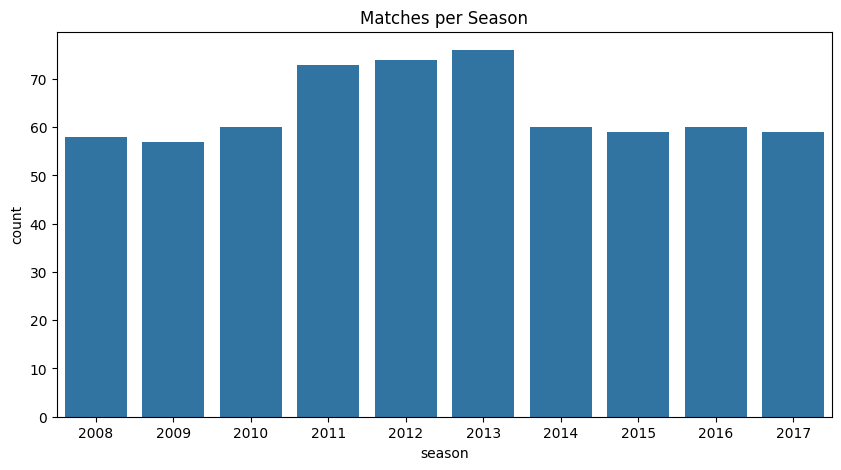

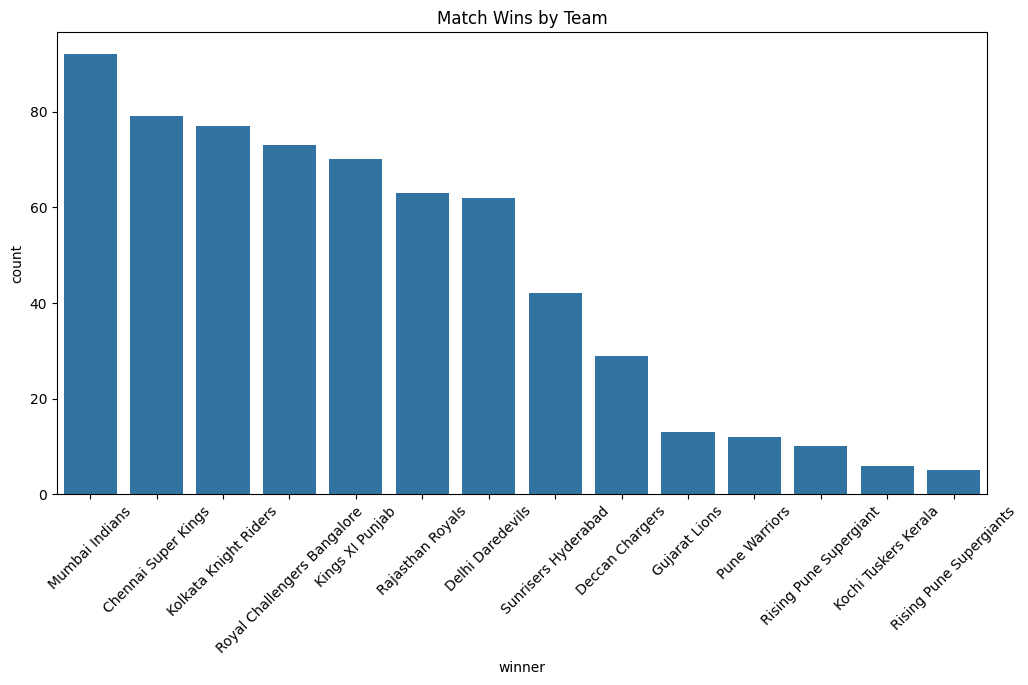

In [6]:
# Visualize basic trends such as the number of matches per season or wins per team.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example: Matches per season
plt.figure(figsize=(10, 5))
sns.countplot(data=matches_df, x='season')
plt.title("Matches per Season")
plt.show()

# Example: Wins per team
plt.figure(figsize=(12, 6))
sns.countplot(data=matches_df, x='winner', order=matches_df['winner'].value_counts().index)
plt.title("Match Wins by Team")
plt.xticks(rotation=45)
plt.show()


In [7]:
# Data Integration & Feature Engineering
# Merge Datasets
# Merge on match id: rename for consistency if needed
matches_df.rename(columns={'id': 'match_id'}, inplace=True)
combined_df = pd.merge(deliveries_df, matches_df, on='match_id', how='left')

# Verify the merge
print(combined_df.head())


   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  result  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
1     2  DA Warner    S Dhawan  TS Mills              0  ...  normal   
2     3  DA Warner    S Dhawan  TS Mills              0  ...  normal   
3     4  DA Warner    S Dhawan  TS Mills              0  ...  normal   
4     5  DA Warner    S Dhawan  TS Mills              0  ...  normal   

   dl_applied               winner  win_by_runs  win_by_wickets  \
0           0  Sunrisers 

In [8]:
# Aggregate total runs per match
match_runs = combined_df.groupby('match_id')['total_runs'].sum().reset_index()
match_runs.columns = ['match_id', 'total_runs']

# Merge back with match-level data if needed
matches_enhanced = pd.merge(matches_df, match_runs, on='match_id', how='left')
print(matches_enhanced.head())


   match_id  season       city        date                        team1  \
0         1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1         2    2017       Pune  2017-04-06               Mumbai Indians   
2         3    2017     Rajkot  2017-04-07                Gujarat Lions   
3         4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4         5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal          

In [9]:
# Save the enhanced matches dataset to CSV for Power BI import
matches_enhanced.to_csv('matches_enhanced.csv', index=False)


In [11]:
# Predictive Modeling in Python
# Prepare the Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# For simplicity, use a subset of features
features = ['season', 'toss_decision', 'win_by_runs', 'win_by_wickets', 'total_runs']
data = matches_enhanced[features + ['winner']].dropna()

# Encode categorical features
le_toss_decision = LabelEncoder()
data['toss_decision'] = le_toss_decision.fit_transform(data['toss_decision'])

le_winner = LabelEncoder()
data['winner_encoded'] = le_winner.fit_transform(data['winner'])

X = data[features]
y = data['winner_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train the Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.10236220472440945
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        22
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3
           4       0.10      0.12      0.11        16
           5       0.00      0.00      0.00         1
           6       0.21      0.16      0.18        19
           7       0.07      0.06      0.06        16
           8       0.00      0.00      0.00         2
           9       0.10      0.12      0.11         8
          10       0.50      0.33      0.40         3
          12       0.00      0.00      0.00        16
          13       0.18      0.33      0.24         6

    accuracy                           0.10       127
   macro avg       0.11      0.10      0.10       127
weighted avg       0.12      0.10      0.11       127



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Making Predictions
# Example: Predicting the winner for a new match
# Construct a sample input for prediction. Ensure that the feature values match the expected format.
sample_data = {
    'season': [2023],                   # Example season
    'toss_decision': [le_toss_decision.transform(['bat'])[0]],  # Transform the categorical input
    'win_by_runs': [10],                # Hypothetical value
    'win_by_wickets': [0],              # Hypothetical value
    'total_runs': [160]                 # Hypothetical total runs scored in the match
}

# Create a DataFrame from the sample data
sample_df = pd.DataFrame(sample_data)

# Make a prediction using the trained Random Forest model
predicted_winner_encoded = rf_model.predict(sample_df)

# Convert the encoded prediction back to the original team label
predicted_winner = le_winner.inverse_transform(predicted_winner_encoded)

print("Predicted Winner:", predicted_winner[0])


Predicted Winner: Royal Challengers Bangalore
